## CNN을 이용한 흑백 이미지 분류

# Step 1. Task 설정
분석할 데이터 :  Fashion MNIST
- 라벨 있음 -> 지도학습
- 라벨종류 -> discrete variable -> 분류분석
- 라벨 수 : 10 -> 다중분류

In [1]:
# 필요한 모듈 불러오기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# STEP 2. 데이터셋 준비하기


## 데이터셋 살펴보기 : Fashion MNIST 데이터셋
* Fashion MNIST는 운동화, 셔츠, 샌들, 가방, 구두 등 패션이미지 들을 모아둔 데이터셋
* 이미지: 각 28*28픽셀, grayscale 이미지임 (색상이 없는 2D 이미지)
* 샘플수 : 총 70,000 (훈련셋 60,000, 테스트셋 10,000)
* 총 10가지의 class가 있음(클래스별 7천개)

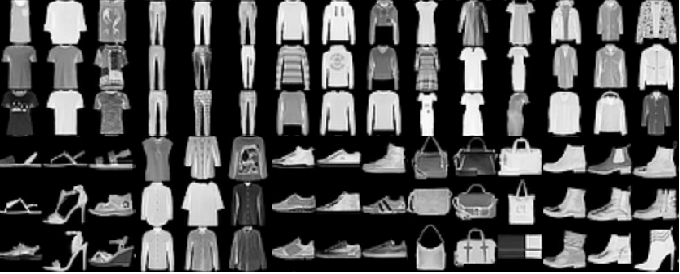

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
 (x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

### 데이터 전처리.
정규화.

이미지 데이터 ( 0 ~ 255 ) 값을 가짐.

- 픽셀 내 색상값을 255로 나누어 준다. : 0~1 값을 가지게 된다.

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [5]:
print("x_train. shape: ",x_train.shape )

x_train. shape:  (60000, 28, 28)


### 컨볼루션 함수
 - 기본적으로 3D 데이터를 받아온다.
 - 회색조 이미지(2D)를 처리하기 위해서 차원 확장을 해준다.

In [6]:
x_train = np.expand_dims(x_train, -1)
x_test= np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
# 라벨 수 확인
K = len(set(y_train))
print(K)

10


In [8]:
print(y_train)
# sparse category 형식이다.

[9 0 0 ... 3 0 5]


## Step 3. 모델 훈련하기.

## CNN의 구조
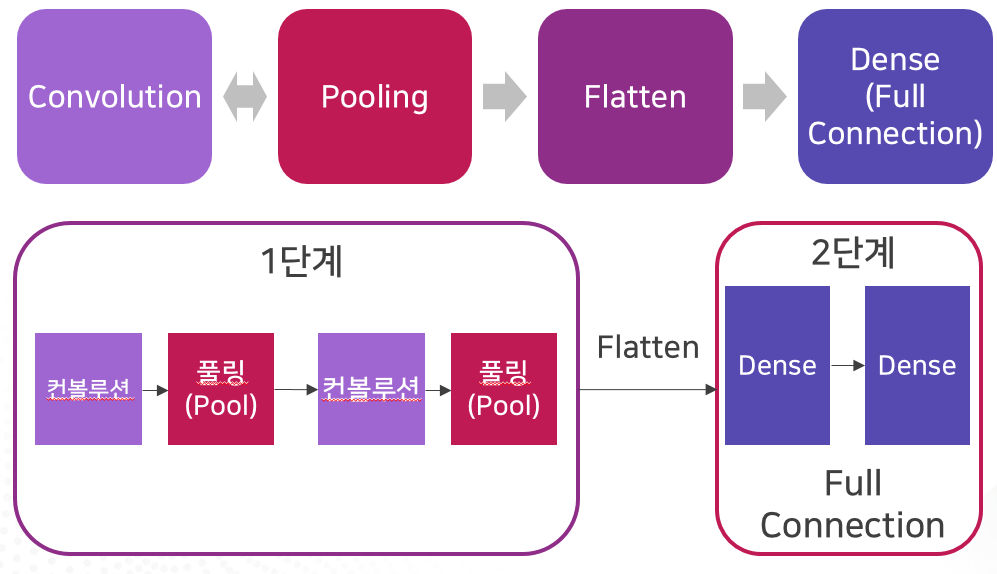

In [9]:
x_train[0].shape

(28, 28, 1)

In [10]:
# Stage 1. Convolution <- feature 추출
# 입력 레이어의 크기 설정
i = Input(shape = x_train[0].shape)

x = Conv2D(32, (3,3), strides = 2, activation = 'relu' )(i)

x = Conv2D(64, (3,3), strides = 2, activation = 'relu' )(x)

x = Conv2D(128, (3,3), strides = 2, activation = 'relu' )(x)

In [11]:
x = Flatten()(x)

In [12]:
x = Dropout(0.2)(x)

In [13]:
# Stage 2 : ANN
x = Dense(512, activation = 'relu')(x)

# Output
x = Dense(K, activation = 'softmax')(x)


model = Model(i,x)


In [14]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [15]:
r = model.fit(x_train,y_train, validation_data=(x_test, y_test) , epochs= 15)

Epoch 1/15


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7496 - loss: 0.6896 - val_accuracy: 0.8424 - val_loss: 0.4185
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8573 - loss: 0.3787 - val_accuracy: 0.8640 - val_loss: 0.3670
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8814 - loss: 0.3158 - val_accuracy: 0.8795 - val_loss: 0.3284
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8932 - loss: 0.2787 - val_accuracy: 0.8828 - val_loss: 0.3140
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9055 - loss: 0.2498 - val_accuracy: 0.8903 - val_loss: 0.2981
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9147 - loss: 0.2249 - val_accuracy: 0.8944 - val_loss: 0.2880
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9208 - loss: 0.2041 - val_accuracy: 0.8920 - val_loss: 0.2960
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9282 - loss: 0.1864 - val

# Step 4. 결과물 평가

# Step 4. 모델 평가
모델학습의 결과로 나오는 학습데이터의 손실값과 테스트 데이터의 손실값을 비교하여 적절한 학습이 진행되는지 확인해 본다
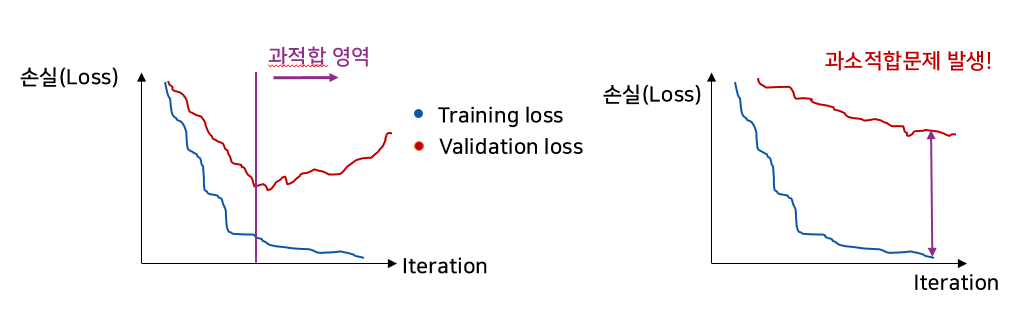


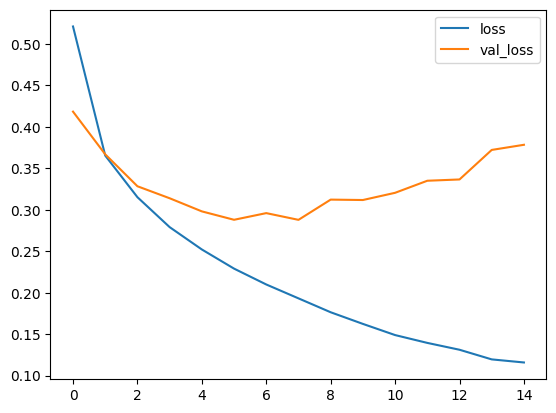

In [16]:
plt.plot(r.history['loss'] , label='loss')
plt.plot(r.history['val_loss'] , label='val_loss')
plt.legend()
plt.show()

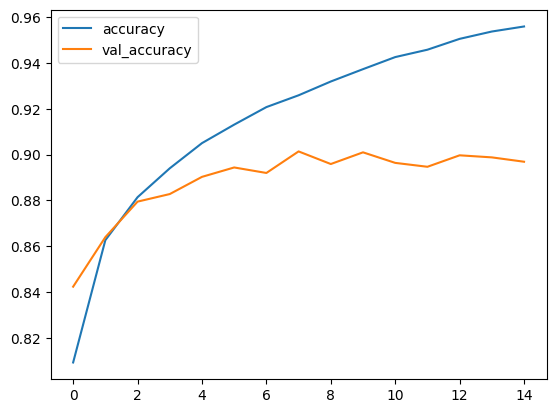

In [17]:
plt.plot(r.history['accuracy'] , label='accuracy')
plt.plot(r.history['val_accuracy'] , label='val_accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix, without normalization
[[845   2  26  19   3   1 100   0   4   0]
 [  4 972   1  16   2   0   4   0   1   0]
 [ 13   1 882   8  45   0  49   0   2   0]
 [ 17   4  13 909  30   1  25   0   1   0]
 [  2   2  80  20 830   0  63   0   3   0]
 [  0   0   0   1   0 976   0  19   1   3]
 [106   0  91  28  85   0 681   0   9   0]
 [  0   0   0   0   0  12   0 980   0   8]
 [  5   2   5   2   2   1   6   2 975   0]
 [  1   0   0   0   0   9   0  70   1 919]]


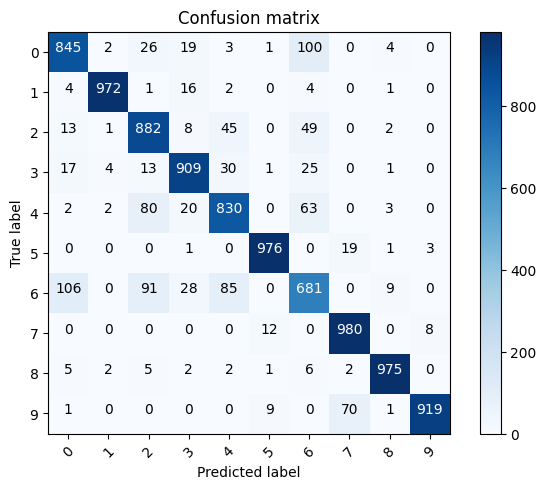

In [18]:
# 오차행렬 시각화 하기
from sklearn.metrics import confusion_matrix
import itertools
# 데이터 구조를 하나하나 훑어보기 위한 모듈

# 오차행렬을 출력하고 시각화 까지 해 주는 사용자 정의 함수를 설정한다
# 단순히 갯수로 출력하는 것이 아니라 % 로 출력하고 싶다면 normalize=True 로 바꾸어 준다
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [19]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

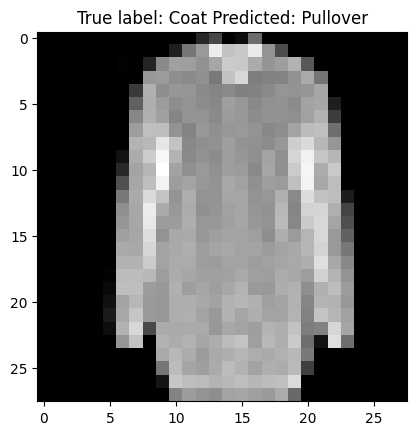

In [20]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));